In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression



In [8]:
def euclidean_distance(point_a, point_b):
    """ calcula a distância euclidiana entre o ponto_a e o ponto_b
    
    Parâmetros:
    - point_a: coordenadas do ponto a
    - point_b: coordenadas do ponto b
    
    Return: 
    distância euclidiana entre dois pontos.
    """
    return np.sqrt(np.sum((point_a - point_b) ** 2))

In [9]:
def initial_weights(num_features):
    """ Atribui peso inicial das features:
    
    Parâmetros:
    - num_features: numero de features
    
    Return: 
    pesos das features iniciam com 0"""
    return np.zeros(num_features)

In [10]:
def add_intercept(X):
    """Adiciona coluna de '1': interceçao.
    
    Parâmetros:
    X: features
    
    Return:
    adiciona coluna com 1
    """
    return np.insert(X, 0, 1, axis=1)
    

In [11]:
def gradient_descent(X, error):
    """
    Calcula o gradiente para atualizar os pesos das features nos dados de treino fazendo a multiplicação entre a 
    transposta da matriz das features (X) e o erro.

    Parâmetros:
    - X: features
    - error: Erro entre os dados previstos e os dados reais.

    Return:
    - Vetor de gradientes.
    """
    return np.dot(X.T, error)/ np.sqrt(X.shape[0])

In [12]:
def update_weights(weights, gradient, learning_rate, num_samples):
    """
    Atualiza os pesos do modelo usando a função 'gradient'.

    Parâmetros:
    - weights: vetor dos pesos das features.
    - gradient: vetor dos gradientes calculados na função 'gradient'.
    - learning_rate: Taxa de aprendizagem.
    - num_samples: Número total de observações.

    Return:
    - Vetor com pesos das features atualizado.
    """
    return weights - learning_rate * gradient / num_samples

In [13]:
def calc_error(y_pred, y):
    """
    Calcula a diferença entre os valores previstos e os valores reais usando a função 'euclidean_distance'.

    Parâmetros:
    - y_pred: valores previstos.
    - y: valores reais (target)

    Retorna:
    - Valor dos erros.
    """
    return euclidean_distance(y_pred, y)

In [14]:
def linear_regression_fit(X, y, learning_rate=0.01, num_iterations=1000):
    """
    Treina e otimiza um modelo de regressão linear usando a função 'gradient_descent'.

    Parâmetros:
    - X: features.
    - y: target
    - learning_rate: Taxa de aprendizagem para o gradiente descendente.
    - num_iterations: Número máximo de iterações durante o treino.

    Retorna:
    - Vetor com pesos das features.
    """
    X = add_intercept(X) # acrescenta coluna de '1's ao dataset com variáveis independentes
    num_samples, num_features = X.shape #contabiliza quantas observações e quantas variáveis existem
    weights = initial_weights(num_features) #atribui peso inicial (definido na função initial_weights como 0) às features

    for _ in range(num_iterations):
        y_pred = np.dot(X, weights) #multiplica o valor das features pelo respetivo peso
        error = y_pred - y #calcula o erro fazendo a diferença entre os valores previstos e os valores reais do nosso target
        gradient = gradient_descent(X, error) #é o resultado da função 'gradient_descent'
        weights = update_weights(weights, gradient, learning_rate, num_samples) # é o resultado na função 'update_weights'

    return weights #retorna os pesos de cada feature

In [22]:
def predict(X, weights):
    """
    Faz previsões utilizando o modelo de regressão linear treinado na função 'linear_regression_fit'

    Parâmetros:
    - X: features 
    - weights: Vetor dos pesos das features

    Return:
    - Valores previstos.
    """
    X = add_intercept(X) # acrescenta coluna de '1's ao dataset com variáveis independentes
    return np.dot(X, weights) #calcula o produto entre a matriz transposta das features e os pesos de cada uma

### Testar modelo

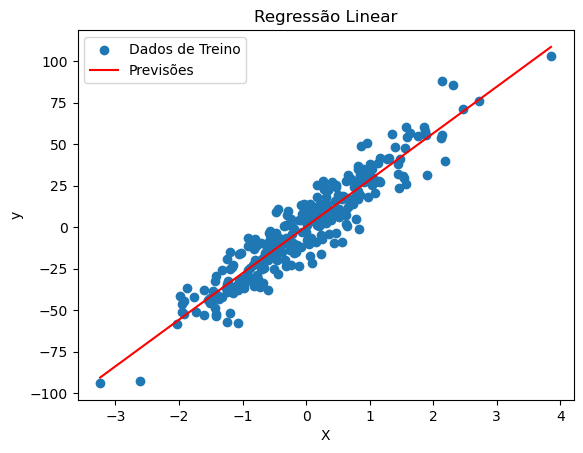

In [39]:
# Criar um conjunto de dados gerados artificialmente para efeitos de testagem do modelo
X, y = make_regression(n_samples=300, n_features=1, noise=10, random_state=42)

# Criar e treinar o modelo de regressão linear
model = linear_regression_fit(X,y) 

# Fazer previsões para o conjunto de dados
X_test = np.linspace(X.min(), X.max(), 100).reshape(-1, 1) #cria uma sequência de 100 pontos espaçados de igual maneira entre o valor mínimo e máximo de X, e faz a distribuição destes dados numa matriz
predictions = predict(X_test, model)

# Plotar os dados e as previsões
plt.scatter(X, y, label="Dados de Treino")
plt.plot(X_test, predictions, color='red', label="Previsões")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regressão Linear")
plt.legend()
plt.show()